**Import The Libraries**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read the data**

In [0]:
df = pd.read_csv("employee_data.csv")


In [13]:
df.columns

Index(['age', 'employment_type', 'salary', 'education', 'marital-status',
       'relationship', 'Gender', 'hours_per_week'],
      dtype='object')

In [14]:
df.head()


,age,employment_type,salary,education,marital-status,relationship,Gender,hours_per_week
0,39,State-gov,77516,Bachelors,Never-married,Not-in-family,Male,40
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Husband,Male,13
2,38,Private,215646,HS-grad,Divorced,Not-in-family,Male,40
3,53,Private,234721,11th,Married-civ-spouse,Husband,Male,40
4,28,Private,338409,Bachelors,Married-civ-spouse,Wife,Female,40


In [26]:
df.shape

(978, 8)

**Problem 1- Identify Categorical variables & Continuous Variables**

In [18]:
# Employment_Type
df['employment_type'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc'], dtype=object)

In [19]:
# Education
df['education'].unique()


array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [20]:
 # marital-status
 df['marital-status'].unique()
 

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [21]:
# relationship 	
df['relationship'].unique()


array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [22]:
# gender
df['Gender'].unique()


array(['Male', 'Female'], dtype=object)

**Continous Variables in dataset**

In [23]:
# Age
len(df['age'].unique())

65

In [25]:
#Salary
len(df['salary'].unique())

966

In [0]:
# hours_per_week

In [28]:
len(df['hours_per_week'].unique())

56

**Problem 2- Carry on a Univariate analysis on all the Variables/Fields. User bar plots for Categorical Variables & histogram or line plot for Continuous ones. Label the plot and axis clearly for intuitive understanding. Mention observations drawn from each Univariate plot**

**For continuous** 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1e80697b8>,
      dtype=object)

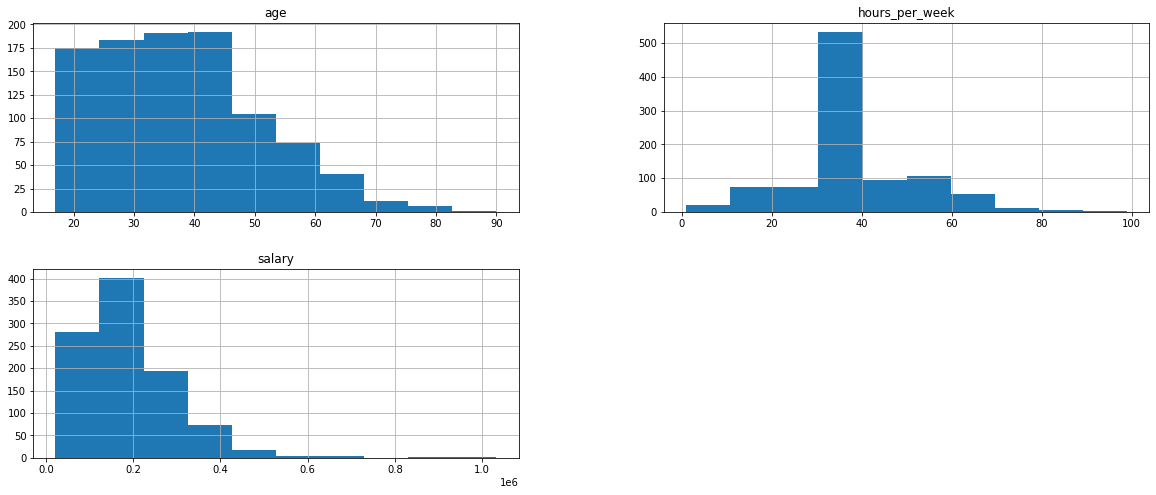

In [31]:
df.hist(figsize=[20,8])



**Inferences drawn from the above plots are:**
           

*   In the age graph mostly employee are in age group 25 to 50 
*   In the hours per week graph mostly employee works for 40 hours oer week
*   In the salary graph we can say that mostly employee has the salary range 0.2 to 0.6





**For categorical data**


Text(0, 0.5, 'No. of employee')

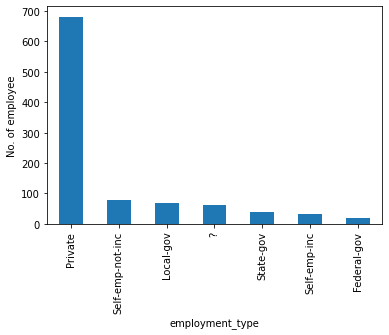

In [40]:
data=df['employment_type'].value_counts().plot(kind='bar')
data.set_xlabel("employment_type")
data.set_ylabel("No. of employee")

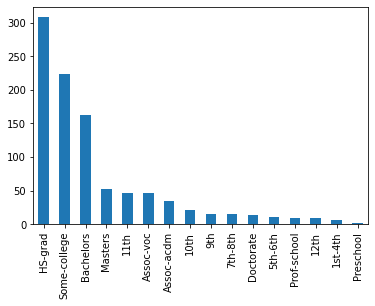

In [41]:
d=df['education'].value_counts().plot(kind='bar')
d

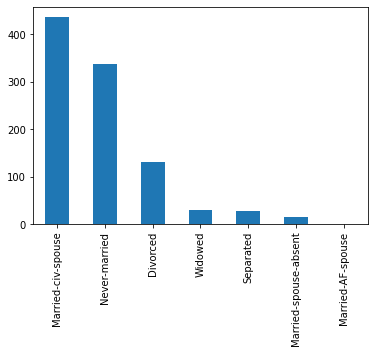

In [44]:
df['marital-status'].value_counts().plot.bar()

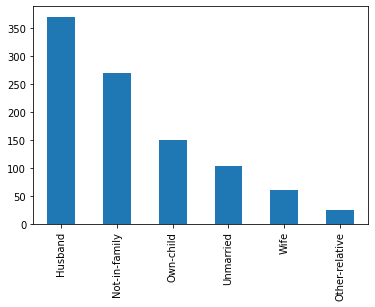

In [45]:
df['relationship'].value_counts().plot.bar()

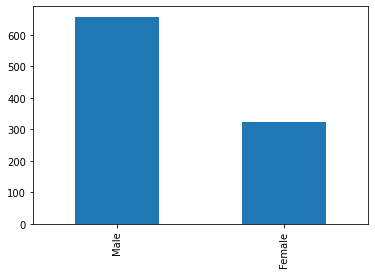

In [48]:
df['Gender'].value_counts().plot(kind='bar')

**Problem 3- Show a bivariate analysis between Salary and hour_per_week.Choose a plot of your choice. Mention the inferences drawn**

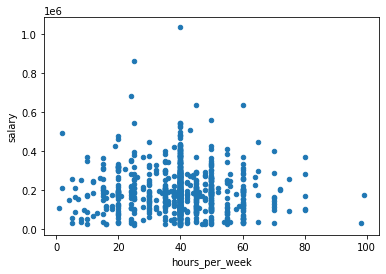

In [51]:
df.plot.scatter(x='hours_per_week', y='salary')

**Inferences drawn from the above plot are:**
*    The highest salary is given for the 40 hours per week
*    As the number of hour per week increases salary also increases



**Problem 4- For each Education type , showcase the distribution of Salary .Use Seaborn Facetgrid & Line plot.Identify the key observations and mention them**



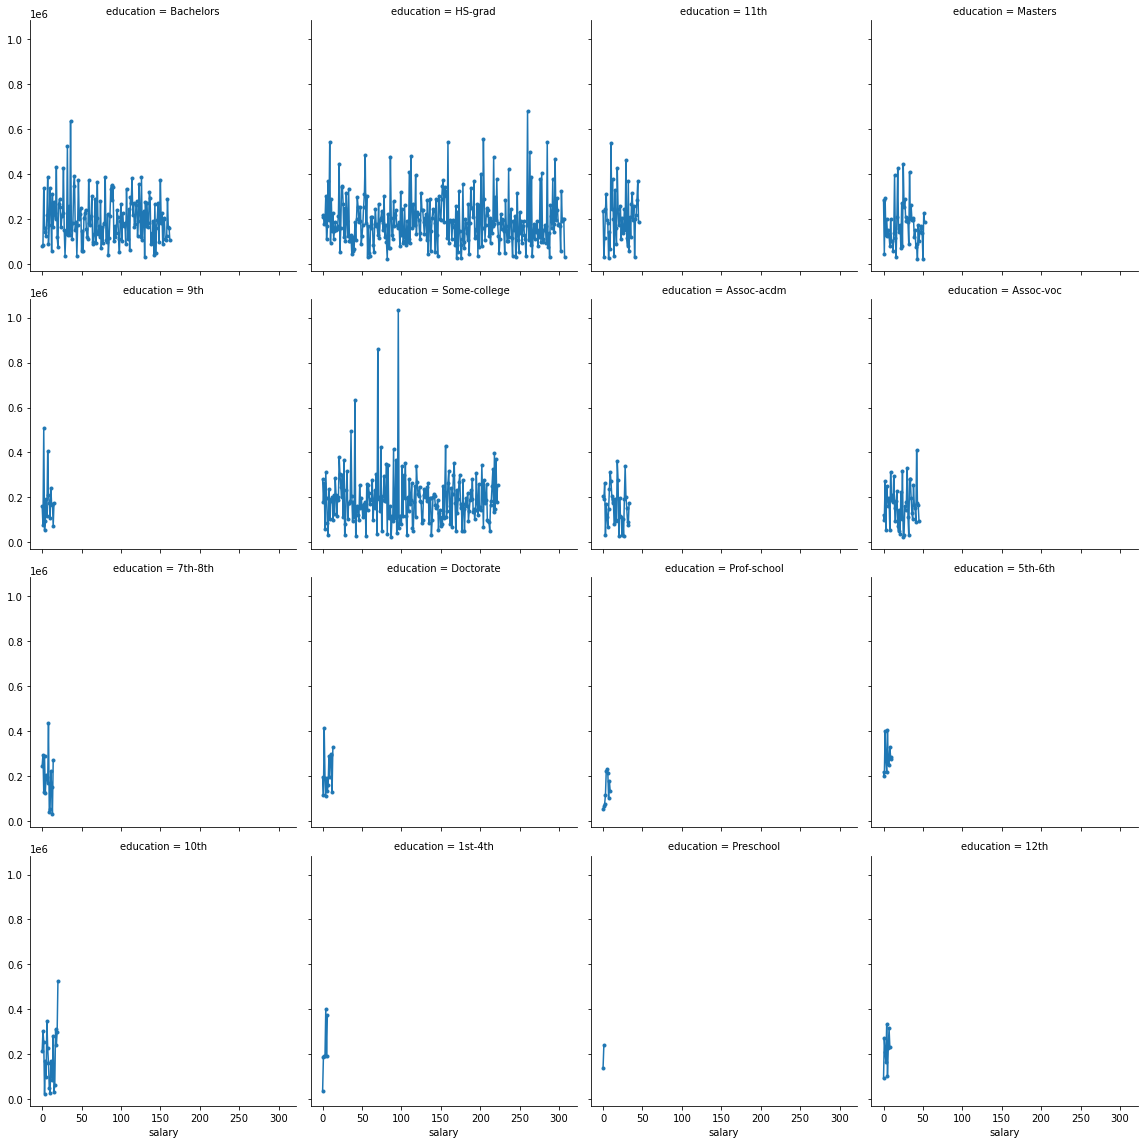

In [60]:
nk = sns.FacetGrid(df,col='education',col_wrap=4,height=4)
nk = nk.map(plt.plot,'salary',marker='.')




The key observations from the above plot are:

    

1.   The number of HS-grad employees are maximum
    
2.   There are minimum number of employees with education as preschool





**Problem 5-Categorizing each Gender & Relationship status (combination of all values) , plot the hours_per_week worked.Choose appropriate plots.Mention the inferences drawn**

In [61]:
df.groupby(['Gender','relationship'])['hours_per_week'].sum()

Gender  relationship  
Female  Not-in-family      4638
        Other-relative      220
        Own-child          1656
        Unmarried          2784
        Wife               2334
Male    Husband           16118
        Not-in-family      6356
        Other-relative      688
        Own-child          3077
        Unmarried          1051
        Wife                 40
Name: hours_per_week, dtype: int64

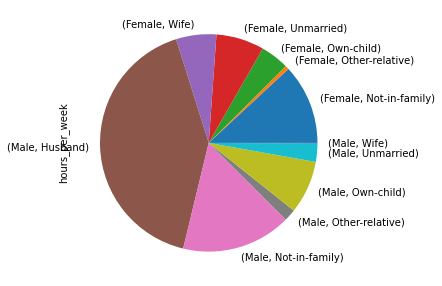

In [63]:
df.groupby(['Gender','relationship'])['hours_per_week'].sum().plot.pie(figsize=[5,5])



**Inferences drawn from the above plot are:**

*    Male- Husband works for the most hours per week
*    Female- Other relative works for least hours per week




**Problem 6 - How many Males that have Marital status ‘Married-civ-spouse’ are earning above 150,000 ?**

In [75]:
N=df[(df['Gender'] =='Male') & (df['marital-status'] == 'Married-civ-spouse') & (df['salary'] > 150000)]
print(N)
print('Total number of Married-civ-spouse  which earn more than 150000 are ',N.shape[0])

     age   employment_type  salary  ... relationship Gender hours_per_week
3     53           Private  234721  ...      Husband   Male             40
7     52  Self-emp-not-inc  209642  ...      Husband   Male             45
9     42           Private  159449  ...      Husband   Male             40
10    37           Private  280464  ...      Husband   Male             80
15    34           Private  245487  ...      Husband   Male             45
..   ...               ...     ...  ...          ...    ...            ...
967   55  Self-emp-not-inc  189721  ...      Husband   Male             20
968   48           Private  164966  ...      Husband   Male             40
970   34           Private  202046  ...      Husband   Male             35
973   37           Private  200153  ...      Husband   Male             40
977   40         State-gov  188693  ...      Husband   Male             35

[226 rows x 8 columns]
Total number of Married-civ-spouse  which earn more than 150000 are  226



**Probelm 7 - Are Divorced Individuals of higher age compared to Individuals that are Not-in-family ? Using mean as a measure , answer the above question & mention the respective age of the two groups.**

In [80]:
N1=df[(df['marital-status'] =='Divorced') & (df['relationship'] !='Not-in-family')]['age'].mean()
N2=df[(df['relationship'] =='Not-in-family') & (df['marital-status'] !='Divorced')]['age'].mean()
print('The mean age of individuals that are divorced :',N1)
print('The mean age of individuals that are not in family :',N2)

The mean age of individuals that are divorced : 40.67272727272727
The mean age of individuals that are not in family : 35.353846153846156


**So,The age of divorced individuals are higher than the age of individuals that are not in family.**